In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
fitspath = '/home/kevin/Documents/Pelican/N-A-L671/no_bias/SUPA01469814.fits'
with fits.open(fitspath) as f:
    hdr = f[0].header.copy()
    data = f[0].data.copy()

In [3]:
hdr['DATA-TYP']

'DEBIAS'

In [4]:
from astropy.wcs import WCS

In [5]:
wcs = WCS(hdr)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2014-07-24T07:37:12.691' from MJD-END'. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]


In [6]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 312.7024875 44.32783889 
CRPIX : -1076.0 4141.0 
CD1_1 CD1_2  : -5.611e-05 0.0 
CD2_1 CD2_2  : 0.0 5.611e-05 
NAXIS : 2048  4177

In [7]:
from astropy import visualization as viz
plt.style.use('dark_background')

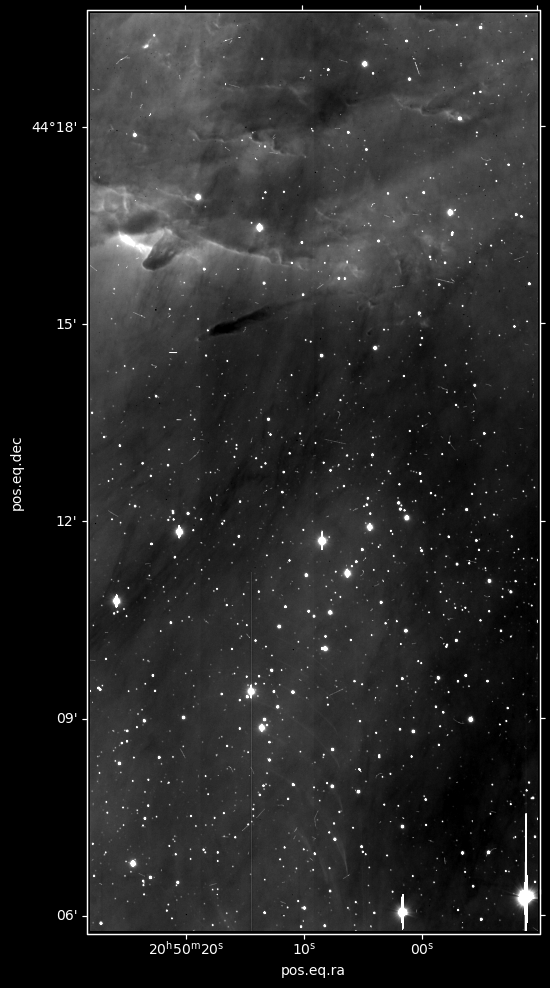

In [8]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection=wcs)
ax.imshow(data, norm=viz.simple_norm(data, min_percent=1, max_percent=99.5), cmap='gray')

In [9]:
from astropy.io.votable import parse_single_table
cat_path = '/home/kevin/Documents/Pelican/N-A-L671/xmatch_tables/SUPA01469814.xml'
catalog = parse_single_table(cat_path).to_table()
catalog

source_id,SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,r_est,RA_MJD,DEC_MJD,x,y,GaiaId
,,,,,,,,,,,,,,,deg,deg,,,
int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,str9
2067050975110291712,2067050975110291712,312.5298395206155,44.08261726095509,0.6262005555728596,5.394838678671325,3.0128458958636064,--,18.893316,20.405533,17.799091,521.9394109326579,94.01645283225213,601.8966424822561,1596.9324701176317,312.5301694662946,44.082752126399505,1130.0851681652994,-224.68811124048352,gaia_0000
2067051005177446912,2067051005177446912,312.5059495201503,44.08634583500539,0.12395796141100107,-4.341182497243086,-3.642774664554315,--,18.152288,19.580564,16.992834,1032.8359898580375,200.99754306148242,1264.8076010496188,8067.251095589989,312.50569875336635,44.0861955452068,1443.2224711424028,-162.61587759331996,gaia_0001
2067051005177447040,2067051005177447040,312.50337355084787,44.087065136119044,-0.34283215326210786,-4.543802149406291,-6.193829350027954,--,19.248262,20.704132,18.070383,376.39336617010247,71.41078004141104,468.8189228387103,-2916.879267258993,312.50311069530517,44.08680554791893,1476.3275451905697,-151.6644398392682,gaia_0002
2067051009474327424,2067051009474327424,312.5052280395565,44.08460874171311,0.6864243496443986,-1.9465825443374014,-5.390782762576994,--,16.956871,18.324457,15.814108,3105.977915112944,639.1961701735553,3745.546441368158,1456.8247768571277,312.50512010798485,44.08438355977621,1450.7078411808584,-194.8921833022314,gaia_0003
2067051039536731648,2067051039536731648,312.50948595382187,44.09358631283402,0.0016609196241357616,-3.586339591537843,-5.915272095349568,--,18.60052,20.045784,17.388409,683.5012555327844,130.94926375396318,878.6077075921543,602076.0941519595,312.50928018647255,44.09333865917712,1397.0741134898535,-35.416680518059366,gaia_0004
2067051039536734720,2067051039536734720,312.5161403732403,44.09602165900579,1.994271409599301,1.4819331916571197,-4.105726325362376,--,18.18647,19.603573,17.03384,1000.8258800325955,196.7830582115786,1217.929612560215,501.43626147702986,312.5162369566424,44.095851534226,1307.924815339779,9.163684564133291,gaia_0005
2067051043829782016,2067051043829782016,312.51682989551955,44.086374600305774,0.8950745588144978,-1.1617887448655346,-2.012968446177097,--,19.639479,20.934187,18.413616,262.5158735138016,57.775288832627176,341.75275484381075,1117.2253642472792,312.5167687724983,44.086294138519,1301.5036020050775,-161.18782243236728,gaia_0006
2067051043829782144,2067051043829782144,312.5161463076485,44.08598563731339,1.0704472489244397,-2.948597707058876,-3.513790128910726,--,19.562923,20.67083,18.414713,281.6938310612604,73.63509177109506,341.4074886211597,934.1889579376999,312.51597860705937,44.08584087360407,1311.637406896552,-169.24325516764566,gaia_0007


In [10]:
len(catalog)

1647

In [11]:
import astropy.units as u

(-0.5, 2047.5, -0.5, 4176.5)

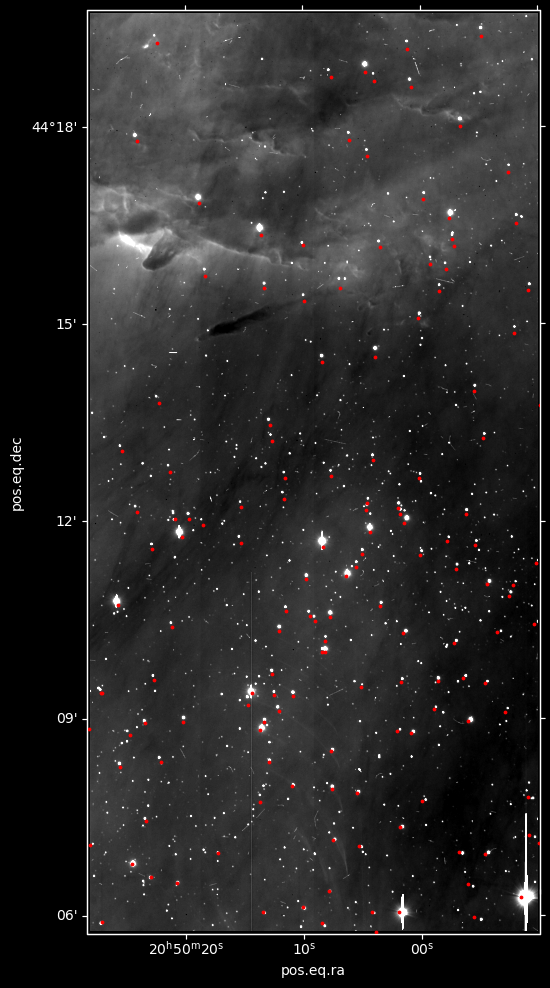

In [12]:
brightstars = catalog['phot_g_mean_mag']<= 18.5
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection=wcs)
ax.imshow(data, norm=viz.simple_norm(data, min_percent=1, max_percent=99.5), cmap='gray')
axlims = ax.axis()
ax.scatter(catalog['RA_MJD'][brightstars], catalog['DEC_MJD'][brightstars],
           transform=ax.get_transform('world'), s=3, color='red')
ax.axis(axlims)

In [13]:
from photutils import DAOStarFinder

/tmp/ipykernel_6537/3232852066.py:1: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder


In [26]:
std = data.std()
daofind = DAOStarFinder(fwhm=3, threshold=4*std)

In [27]:
imagecat = daofind(data-np.nanmedian(data))

(-0.5, 2047.5, -0.5, 4176.5)

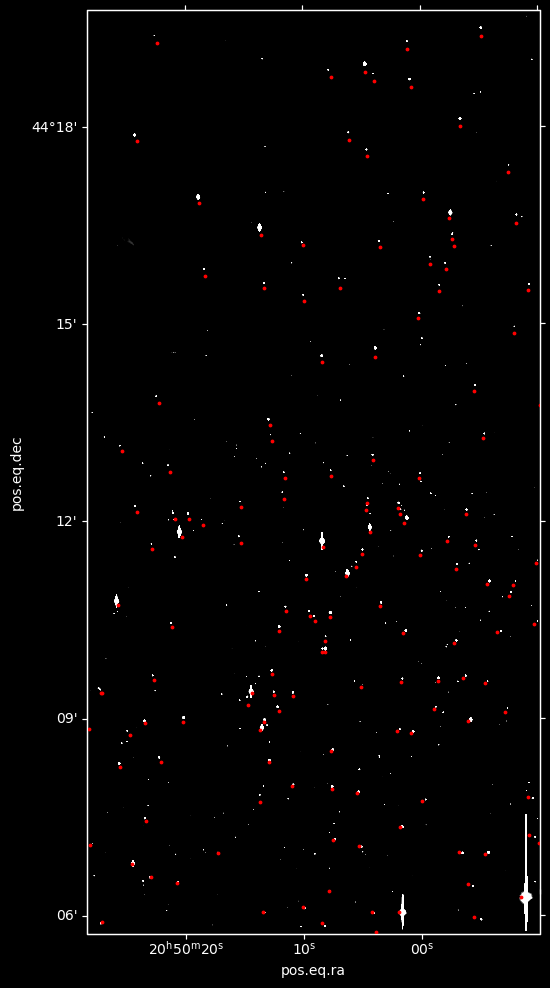

In [24]:
brightstars = catalog['phot_g_mean_mag']<= 18.5
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection=wcs)
ax.imshow(data-np.nanmedian(data), norm=viz.simple_norm(data, min_percent=1, max_percent=99.5), cmap='gray')
axlims = ax.axis()
ax.scatter(catalog['RA_MJD'][brightstars], catalog['DEC_MJD'][brightstars],
           transform=ax.get_transform('world'), s=3, color='red')
ax.axis(axlims)